# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
df=pd.read_csv('real_estate_data.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
df.describe() #посмотрим общую информацию о датафрейме

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


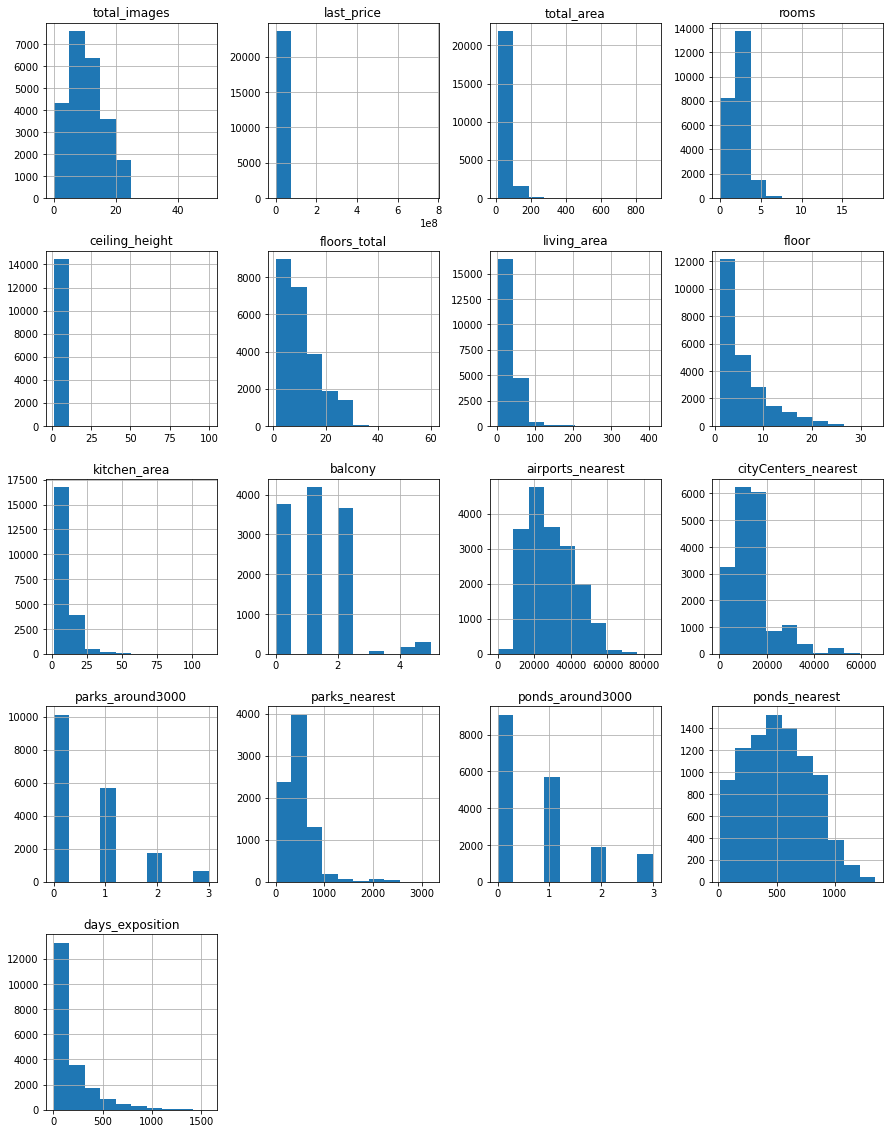

In [3]:
df.hist(figsize=(15,20)); #построим гистограммы для всех столбцов датафрейма

 Открыв файл и изучив данные при помощи методов `info()`, `describe()` и построив гистограммы, можно увидеть следующие проблемы в данных:
 * В некоторых столбцах присутствуют пропуски, в отдельных столбцах их количество значительно
 * Есть проблемы с типом данных в столбцах
 * Из гистограмм можно увидеть, что присутствуют пики в районе нуля для некоторых параметров
 

### Предобработка данных 

In [4]:
df.isna().sum() # смотрим на количество пропусков в разных столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заменим пропуски в столбцах там, где это возможно и необходимо

In [5]:
df['ceiling_height'].value_counts()

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [6]:
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].median()) #заменяем пропуски на медианное значение
df['ceiling_height'].isna().sum() #проверяем количество пропусков


0

In [7]:
df['ceiling_height'].value_counts()

2.65     9871
2.50     3515
2.60     1646
2.70     1574
3.00     1112
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

Таким образов мы заполнили пропуски в столбце с высотой потолков медианным значением

In [8]:
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

In [9]:
print(df['floors_total'].isna().sum()/len(df['floors_total'])) #смотрим долю пропусков от общего числа строк

0.0036288450989493226


Поскольку пропусков в столбце с количеством этажей в доме незначительное количество по сравнению с общим числом строк в таблице, оставим эти пропуски без изменений

В столбце с указанием жилой площади и площади кухни оставим пропуски без изменений

In [10]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [11]:
df['is_apartment']=df['is_apartment'].fillna(False) #заменяем пропуски на False
print(df['is_apartment'].value_counts())
print(df['is_apartment'].isna().sum()) #проверяем количество пропусков

False    23649
True        50
Name: is_apartment, dtype: int64
0


В столбце с типом обьекта недвижимости заменим пропуски на значение `False`, то есть большинство обьектов будет иметь тип недвижимости 'квартира' 

In [12]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [13]:
df['balcony']=df['balcony'].fillna(0) # заменяем пропуски на ноль

In [14]:
df['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [15]:
df['balcony'].isna().sum() #проверяем количество пропусков

0

Мы заменили пропуски в столбце с числом балконов на нули, будем считать, что балконов в таких квартирах нет

In [16]:
df['locality_name'].value_counts()

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
                     ...  
деревня Терпилицы        1
село Никольское          1
поселок Каложицы         1
поселок Калитино         1
деревня Лаврики          1
Name: locality_name, Length: 364, dtype: int64

In [17]:
df['locality_name'].isna().sum()/len(df['locality_name']) #смотрим долю пропусков от общего числа строк

0.002067597788936242

Поскольку пропусков в столбце с названием населенного пункта незначительное количество по сравнению с общим числом строк в таблице, оставим эти пропуски без изменений

In [18]:
df['airports_nearest'].value_counts()

37434.0    61
21928.0    32
39946.0    30
44870.0    30
18732.0    27
           ..
53478.0     1
20335.0     1
33699.0     1
26945.0     1
20875.0     1
Name: airports_nearest, Length: 8275, dtype: int64

Так как в дальнейшем для исследования нам не понадобятся эти данные, оставим пропуски в столбце с расстоянием до 
аэропорта без изменения

In [19]:
df['cityCenters_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
5278.0      1
11575.0     1
3205.0      1
12747.0     1
4234.0      1
Name: cityCenters_nearest, Length: 7642, dtype: int64

In [20]:
df['cityCenters_nearest']=df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median()) #заменяем пропуски на медианное значение
df['cityCenters_nearest'].value_counts()

13098.5    5519
8460.0       61
20802.0      32
10720.0      30
20444.0      27
           ... 
8565.0        1
5278.0        1
11575.0       1
3205.0        1
4234.0        1
Name: cityCenters_nearest, Length: 7643, dtype: int64

In [21]:
df['cityCenters_nearest'].isna().sum() #проверяем количество пропусков

0

Поскольку расстояние до центра города нам в дальнейшем понадобится для исследования, заменим пропуски на 
медианные значения расстояния

Что касается пропусков в столбцах, содержащих картографическую информацию, оставим пропуски в этих столбцах без изменений

In [22]:
df['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

Пропуски в столбце со временем публикации обьявления оставим без изменений: если присутствует пропуск,это может означать, что кваритра просто еще не продана

**Вывод**

Мы изучили пропуски в данных и заменили их там, где это было возможно и целесообразно. 
Где-то пропуски могли возникнуть при ручном заполнении данных, например, в столбце с количеством балконов человек
мог посчитать, что если балкона в квартире нет, данные можно не вносить в таблицу.
В тех столбцах, где данные вносились автоматически, например расстояние до ближайшего парка/аэропорта/водоема, пропуски могли возникнуть из-за ошибок автоматизации: например неизвестно, что именно считать парком или водоемом, какого размера обьект относится к определенной категории.

***Замена типов данных***

In [23]:
df['is_apartment'].unique()

array([False,  True])

In [24]:
df['is_apartment']=df['is_apartment'].astype('bool') #заменим тип данных в столбце на булевые значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [25]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition']) #заменим значения в столбце с датой на тип данных datetime64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [26]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [27]:
df['floors_total']=df['floors_total'].fillna(df['floors_total'].median())#заменим nan на медианное значение

In [28]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [29]:
df['floors_total'].astype(int)#преобразуем в целочисленный тип

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23699, dtype: int64

In [30]:
df['last_price']=df['last_price'].astype(int)#преобразуем в целочисленный тип

In [31]:
df['balcony']=df['balcony'].astype(int)#преобразуем в целочисленный тип

Изменили тип данных в столбцах:

* В столбце с датой публикации обьявления заменили тип данных со строкового в тип данных  `datetime64`
* В столбце с информацией о том, является ли обьект недвижимости апартаментами, заменили тип данных на булевый
* В столбце с количеством этажей заменили тип данных на целочисленный
* В столбце с количеством балконов заменили тип данных на целочисленный
* В столбце с последней ценой заменили тип данных на целочисленный

***Проверка неявных дубликатов***

In [32]:
df['locality_name'].sort_values().unique() # посмотрим на уникальные значения в столбце с названием населенных пунктов

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [33]:
df['locality_name']=df['locality_name'].replace('поселок Мурино','посёлок Мурино') # методом replace заменим названия в столбцах
df['locality_name']=df['locality_name'].replace('поселок Аннино','посёлок Аннино')
df['locality_name']=df['locality_name'].replace('поселок Бугры','посёлок Бугры')
df['locality_name']=df['locality_name'].replace('поселок Возрождение','посёлок Возрождение')
df['locality_name']=df['locality_name'].replace('поселок Гаврилово','посёлок Гаврилово')
df['locality_name']=df['locality_name'].replace('поселок Жилгородок','посёлок Жилгородок')
df['locality_name']=df['locality_name'].replace('поселок Ильичёво','посёлок Ильичёво')
df['locality_name']=df['locality_name'].replace('поселок Лисий Нос','посёлок Лисий Нос')
df['locality_name']=df['locality_name'].replace('поселок Мельниково','посёлок Мельниково')
df['locality_name']=df['locality_name'].replace('поселок Мичуринское','посёлок Мичуринское')
df['locality_name']=df['locality_name'].replace('поселок Новый Свет','посёлок Новый Свет')
df['locality_name']=df['locality_name'].replace('поселок Пансионат Зелёный Бор','посёлок Пансионат Зелёный Бор')
df['locality_name']=df['locality_name'].replace('поселок Перово','посёлок Перово')
df['locality_name']=df['locality_name'].replace('поселок Победа','посёлок Победа')
df['locality_name']=df['locality_name'].replace('поселок Стеклянный','посёлок Стеклянный')
df['locality_name']=df['locality_name'].replace('поселок Сумино','посёлок Сумино')
df['locality_name']=df['locality_name'].replace('поселок Тельмана','посёлок Тельмана')
df['locality_name']=df['locality_name'].replace('поселок Терволово','посёлок Терволово')



**Вывод**

Отсортировав по алфавиту названия в столбцах населенных пунктов, можно увидеть неявные дубликаты в названиях.
В основном это связано с синтаксисом: где-то 'поселок', а где-то 'посёлок'.
Методом `replace` заменили увиденные дубликаты.

***Изучение аномалий***

Изучим выбивающиеся значения в разных столбцах таблицы:
В столбце со значением площади недвижимости видим аномально большое значение максимальной площади - 900.
Построим гистограмму и диаграмму размаха.
Изучив значения, принимаем решение считать квартиры, где площадь больше 200 квадратных метров, - аномалиями.
Отфильтруем таблицу, удалив некорректные значения.

900.0
AxesSubplot(0.125,0.125;0.775x0.755) [[<AxesSubplot:title={'center':'total_area'}>]]


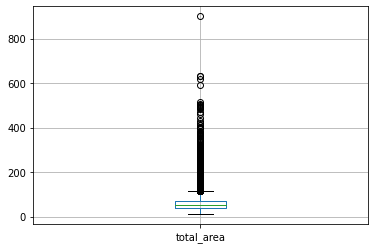

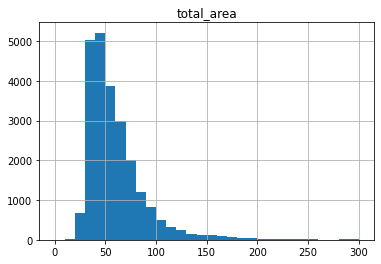

In [34]:
print(df['total_area'].max())
print(df.boxplot('total_area'),df.hist('total_area',bins=30,range=(0,300)));





In [35]:
df=df[df['total_area']<200]




Проверим результат:

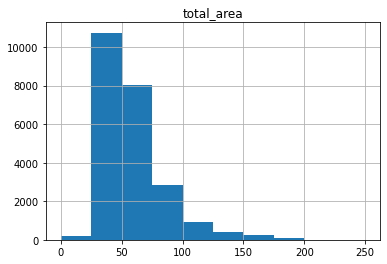

In [36]:
df.hist('total_area',range=(0,250));

Дальше посмотрим столбец с количеством комнат.
Там, где стоит ноль, будем считать, что это - студия.
Число комнат 11 кажется неправдоподобным.
Отфильтруем число комнат не больше 5:


[ 3  1  2  4  5  6  0 11  7  8]


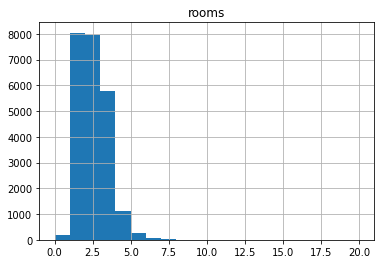

In [37]:
print(df['rooms'].unique())
df.hist('rooms',bins=20,range=(0,20));

In [38]:
df=df[df['rooms']<=5]
df['rooms'].unique()

array([3, 1, 2, 4, 5, 0])

Теперь посмотрим на высоту потолков

Максимальное значение в 100 и минимальное в 1 метр вызывает вопросы.

AxesSubplot(0.125,0.125;0.775x0.755) [[<AxesSubplot:title={'center':'ceiling_height'}>]]
100.0 1.0


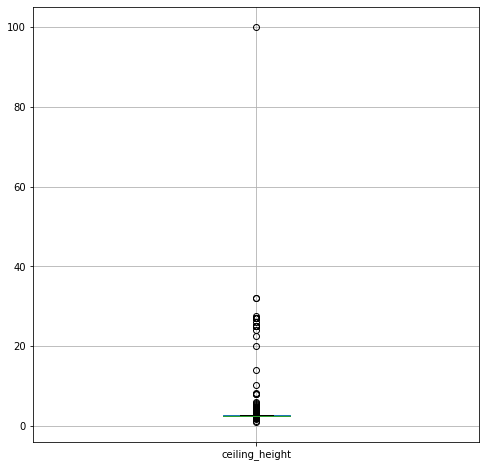

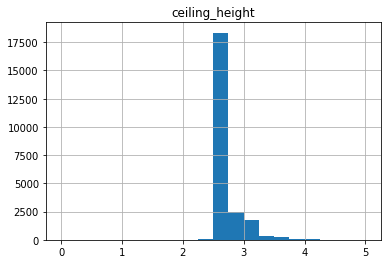

In [39]:
print(df.boxplot('ceiling_height',figsize=(8,8)),df.hist('ceiling_height',bins=20,range=(0,5)));
print(df['ceiling_height'].max(),df['ceiling_height'].min())



Ограничим высоту потолков значениями 2.50 и 3.20

In [40]:
df=df[df['ceiling_height']<=3.20]
df=df[df['ceiling_height']>=2.50]
df['ceiling_height'].max(),df['ceiling_height'].min()


(3.2, 2.5)

Далее посмотрим на количество этажей в доме

Вряд ли в таблицу могли попасть дома, которые имеют более 33 этажей, поэтому их мы смело уберем из таблицы

AxesSubplot(0.125,0.125;0.775x0.755) [[<AxesSubplot:title={'center':'floors_total'}>]]


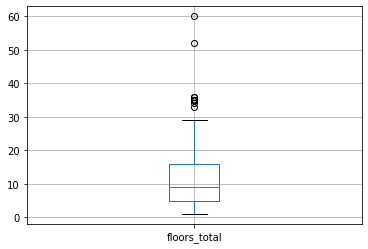

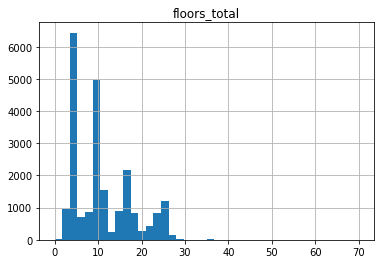

In [41]:
print(df.boxplot('floors_total'),df.hist('floors_total',bins=40,range=(0,70)));

In [42]:
df=df[df['floors_total']<=33]
df['floors_total'].max()

33.0

Что касается жилой площади, вопросы есть и к этому столбцу

Есть сомнения, что человек может жить в квартире площадью 2 квадратных метра

Так же отфильтруем площадь больше 125 квадратных метров, отнеся ее к аномалиям



AxesSubplot(0.125,0.125;0.775x0.755) [[<AxesSubplot:title={'center':'living_area'}>]]
147.0 2.0


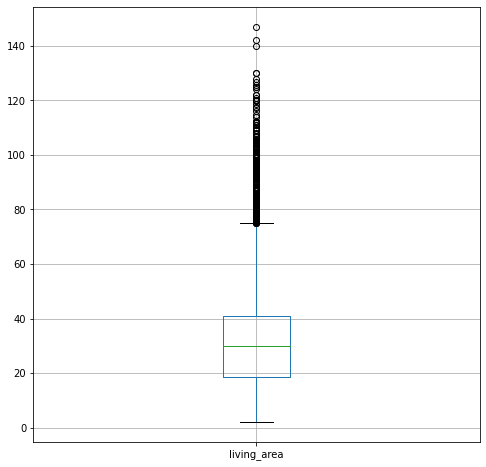

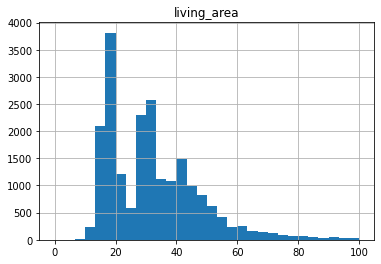

In [43]:
print(df.boxplot('living_area',figsize=(8,8)),df.hist('living_area',bins=30,range=(0,100)));
print(df['living_area'].max(),df['living_area'].min())

In [44]:
df=df[df['living_area']<=125]
df=df[df['living_area']>10]
print(df['living_area'].max(),df['living_area'].min())

125.0 10.08


Аналогично поступим и с площадью кухни



AxesSubplot(0.125,0.125;0.775x0.755) [[<AxesSubplot:title={'center':'kitchen_area'}>]]


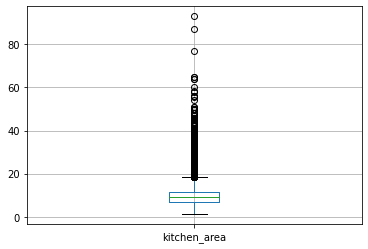

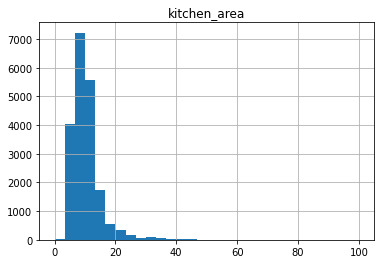

In [45]:
print(df.boxplot('kitchen_area'),df.hist('kitchen_area',bins=30,range=(0,100)));

In [46]:
df=df[df['kitchen_area']<=40]
df=df[df['kitchen_area']>5]
print(df['kitchen_area'].min(),df['kitchen_area'].max())

5.04 40.0


***Вывод***

Исходя из наглядного представления с помощью гистограмм и диаграмм размаха, а так же здравого смысла, мы удалили из исходной таблицы обьекты недвижимости, имеющие неправдоподобные и аномальные показатели по некоторым параметрам. 

### Посчитаем и добавим в таблицу новые столбцы

In [47]:
df['one_sqr_meter_price']=df['last_price']/df['total_area'] # добавим столбец со стоимостью одного кв.метра жилья
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_sqr_meter_price
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,0,городской посёлок Янино-1,NaN,13098.5,NaN,NaN,NaN,NaN,55.0,95065.789474
6,6,3700000,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456


In [48]:
df['public_day']=df['first_day_exposition'].dt.weekday # добавляем столбец с номером первого дня публикации обьявления
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_sqr_meter_price,public_day
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,городской посёлок Янино-1,NaN,13098.5,NaN,NaN,NaN,NaN,55.0,95065.789474,0
6,6,3700000,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3


In [49]:
df['public_month']=df['first_day_exposition'].dt.month # добавляем столбец с номером месяца публикации обьявления
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_sqr_meter_price,public_day,public_month
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,13098.5,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9
6,6,3700000,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11


In [50]:
df['public_year']=df['first_day_exposition'].dt.year # добавляем столбец с номером года публикации обьявления
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_sqr_meter_price,public_day,public_month,public_year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,13098.5,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018
6,6,3700000,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017


In [51]:
def floor_type(row): # добавляем столбец с названием этажа, где находится обьект недвижимости
    if row['floor']==1:
        return 'Первый'
    if row['floor']==row['floors_total']:
        return 'Последний'
    return 'Другой'
df['floor_type_flat']=df.apply(floor_type,axis=1)
df.head(12)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_sqr_meter_price,public_day,public_month,public_year,floor_type_flat
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,Другой
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,Первый
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,Другой
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,Другой
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,Другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,Другой
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,Другой
11,9,3300000,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,...,0.0,NaN,0.0,NaN,7.0,75000.000000,0,8,2018,Другой
12,10,3890000,54.00,2016-06-30,2,2.65,5.0,30.00,5,False,...,NaN,NaN,NaN,NaN,90.0,72037.037037,3,6,2016,Последний


In [52]:
df['cityCenters_nearest_km']=df['cityCenters_nearest'].round()/1000 # добавляем столбец с расстоянием до ближайшего города в километрах
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_sqr_meter_price,public_day,public_month,public_year,floor_type_flat,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,Другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,Первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,13.933
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,Другой,13.098
6,6,3700000,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,Другой,19.143


Добавили в таблицу следующие столбцы:

* цена одного квадратного метра     
* день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
* месяц публикации объявления
* год публикации объявления
* тип этажа квартиры (значения — «первый», «последний», «другой»)
* расстояние в км до центра города

### Проведем исследовательский анализ данных

Рассмотрим различные параметры обьектов недвижимости

Начнем с **общей площади**

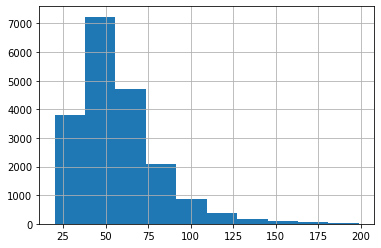

In [53]:
df['total_area'].hist();


Можно видеть, что больше всего квартир с площадью порядка 40-50 квадратных метров

Обьекты недвижимости с площадью более 150 квадратных метров встречаются крайне редко

Теперь посмотрим на **жилую площадь**

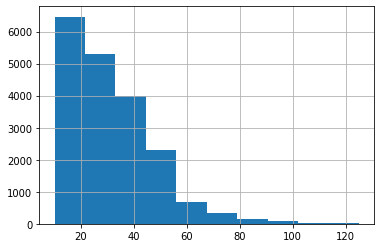

In [54]:
df['living_area'].hist();

Жилая площадь в большинстве квартир находится в пределах 30 квадратных метров

Хотя, есть и совсем небольшие квартиры с жилой площадью порядка 10 квадратных метров

Перейдем к **площади кухни**

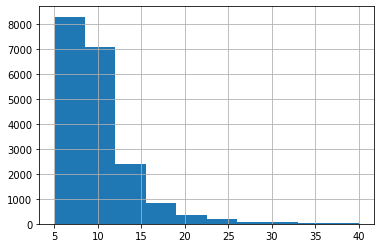

In [55]:
df['kitchen_area'].hist();

В основном в нашем датасете представлены квартиры с совсем небольшой площадью кухни, в районе 10 квадратных метров

Но есть и кухни с площадью более 20 квадратных метров, правда их число невелико

Безусловно, самый главный параметр - это **цена обьекта недвижимости**

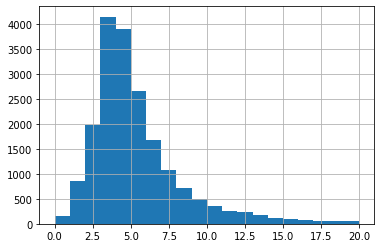

In [56]:
(df['last_price']/1000000).hist(bins=20,range=(0,20));

Можем наблюдать, что основная масса цен на недвижимость находится в районе 4-5 миллионов рублей, хотя встречаются и 

обьекты недвижимости дороже 10 миллионов 

**Количество комнат** в квартирах наблюдаем на следующем графике

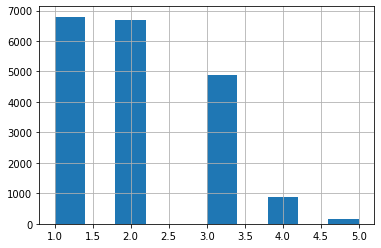

In [57]:
df['rooms'].hist();

Количество студий в нашем списке - невелико, в основном преобладают однокомнатные и двухкомнатные квартиры

Что касается **высоты потолков**, рассмотрим график

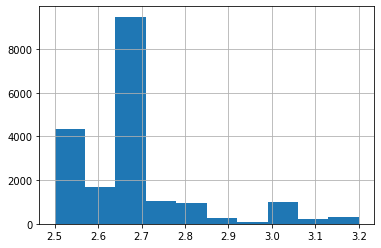

In [58]:
df['ceiling_height'].hist();

В основном, квартиры имеют высоту потолков 2.50, хотя есть и квартиры,вероятно,старого жилого фонда с высотой более трех метров

Рассмотрим **этажность** обьектов недвижимости

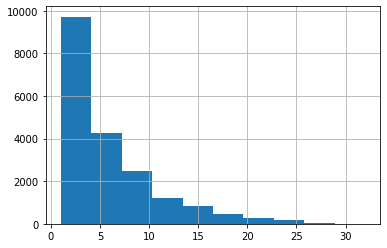

In [59]:
df['floor'].hist();

Как видно из графика, в основном квартиры расположены на низких этажах, с первого по пятый

Хотя есть и обьекты недвижимости в высотных домах на 25 этаже и выше

Рассмотрим более внимательно, какие **типы этажей** наиболее распространены

<AxesSubplot:xlabel='floor_type_flat'>

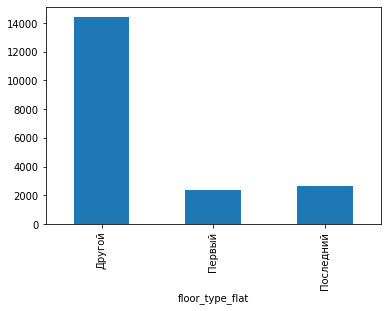

In [60]:
floor=df.groupby('floor_type_flat')['floor'].count()
floor.plot.bar(x='floor_type_flat',y='floor')

Как мы можем видеть из графика, в основном продаются квартиры не на первом или последнем этажах

**Общее количество этажей в доме** рассмотрим далее

<AxesSubplot:>

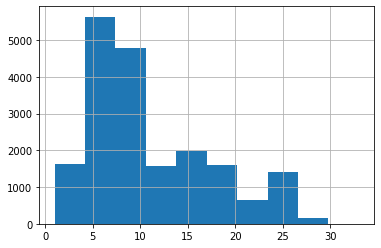

In [61]:
df['floors_total'].hist()

В основном в нашем датафрейме представлены на продажу квартиры в малоэтажных домах, от 5 до 10 этажей

Хотя есть и небольшое количество высоток, более 25 этажей

**Расстояние до центра города** можно посмотреть на следующем графике

<AxesSubplot:>

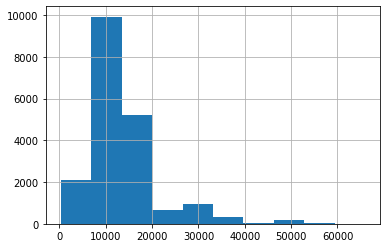

In [62]:
df['cityCenters_nearest'].hist()

Как видно из графика, бОльшая часть обьектов недвижимости находится на расстоянии 10 км от центра города, что является вполне комфортным расстоянием

Однако, есть квартиры и в непосредственной близости к центру, но и цена на них будет гораздо больше, что мы увидим в дальнейших исследованиях 

**Расстояние до ближайших парков и аэродрома** можно посмотреть на следующих двух графиках

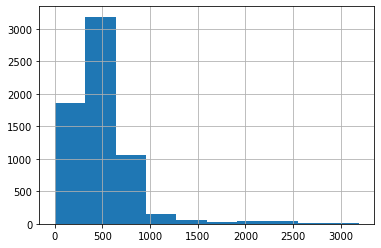

In [63]:
df['parks_nearest'].hist();

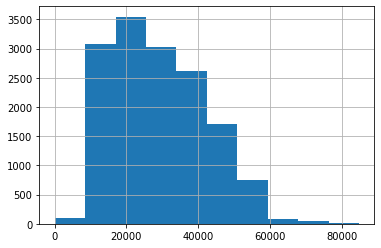

In [64]:
df['airports_nearest'].hist();

Как мы можем видеть, большинство квартир продается в непосредственной близости к паркам и далеко от аэропортов, так что будущим жильцам будет где погулять и им не будет мешать шум самолетов

Можем выяснить, на **какой период пришлось наибольшее количество поданых обьявлений о продаже**

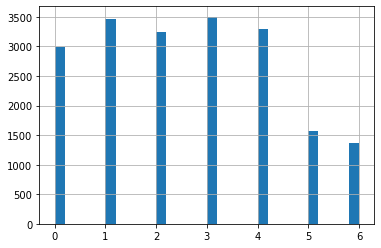

In [85]:
df['public_day'].hist(bins=30);

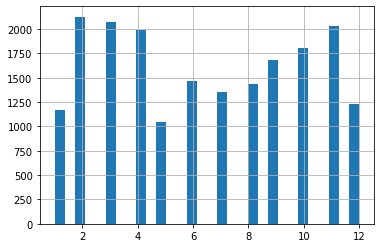

In [86]:
df['public_month'].hist(bins=30);

Можем видеть, что в основном обьявления о продаже квартир появляются в начале и конце недели (вторник,четверг и пятница)

Что же касается месяцев, то наиболее часто обьявления появляются в начале и конце года (февраль, март, октябрь и ноябрь)

Посмотрим, **как быстро обычно продаются квартиры**

Для этого построим гистограмму, диаграмму размаха и посмотрим на среднее и медиану

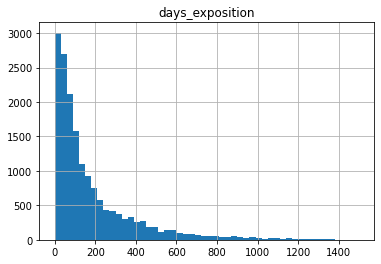

In [87]:
df.hist('days_exposition',bins=50,range=(0,1500)); #строим гистограмму

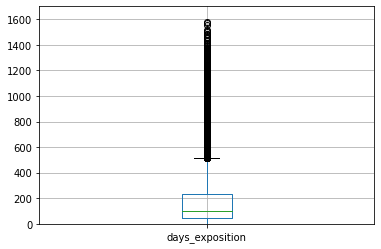

In [88]:
import matplotlib.pyplot as plt #строим диаграмму размаха 

plt.ylim(0, 1700)

df.boxplot('days_exposition',figsize=(10,10));

In [69]:
df['days_exposition'].describe() #смотрим на среднее и медиану

count    16865.000000
mean       181.964601
std        218.348792
min          1.000000
25%         44.000000
50%         99.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

Исходя из графиков, можно сделать следующий **вывод**:

* Есть такие кваритры, которые улетают как горячие пирожки, за один день. Исключать такого нельзя, вполне допустимо, что это - очень выгодные предложения
* Есть квартиры, которые продаются по пять лет. Это конечно очень долгий срок, но это тоже нельзя исключать - может, владельцы недвижимости долгое время не хотели снижать стоимость или же квартира просто не интересует покупателей
* В среднем квартиры продаются за 3 месяца, что вполне рельный срок
* При этом на графике видны пики и в районе одного месяца, такой срок вполне можно считать быстрым и удачным для сделки




Изучим, **какие факторы больше всего влияют на стоимость обьекта недвижимости**

In [70]:
matrix=df.pivot_table(index='last_price',values=['total_area','living_area','kitchen_area','rooms','floor','first_day_exposition'])
print(matrix)
 



                floor  kitchen_area  living_area     rooms  total_area
last_price                                                            
430000       1.000000          6.00    16.000000  1.000000   30.400000
450000       2.666667          6.60    23.533333  1.666667   40.633333
470000       2.500000          8.25    30.000000  1.500000   42.750000
490000       5.000000          5.50    17.000000  1.000000   29.100000
500000       2.333333          7.80    21.033333  1.333333   38.900000
...               ...           ...          ...       ...         ...
77000000    12.000000         39.10    59.700000  3.000000  186.000000
82000000     4.000000         20.00    78.500000  3.000000  114.000000
83820000     8.000000         11.00    82.000000  3.000000  153.000000
86738800     8.000000         25.86    89.700000  5.000000  190.000000
124000000    2.000000         20.00    67.200000  4.000000  124.500000

[2370 rows x 5 columns]


In [71]:

print(df['last_price'].corr(df['total_area']))
print(df['last_price'].corr(df['living_area']))
print(df['last_price'].corr(df['kitchen_area'])) #посчитаем коэфициенты кореляции для разных параметров
print(df['last_price'].corr(df['rooms']))
print(df['last_price'].corr(df['floor']))

0.7194676376982491
0.6065095583600946
0.5284884506646791
0.4205960555957543
0.08405800943244272


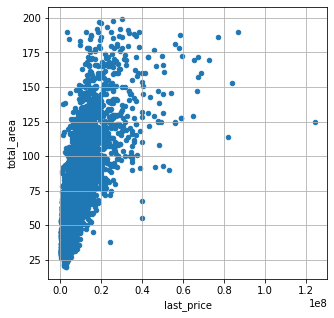

In [89]:
df.plot(x='last_price', y='total_area', kind='scatter',figsize=(5, 5), sharex=False, grid=True); # смотрим зависимость стоимости недвижимости от общей площади

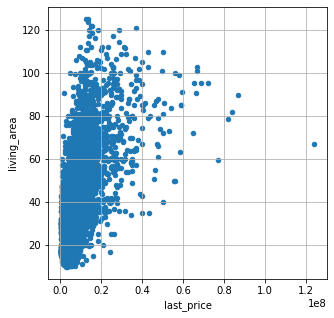

In [90]:
df.plot(x='last_price', y='living_area', kind='scatter',figsize=(5, 5), sharex=False, grid=True); # смотрим зависимость стоимости недвижимости от жилой площади

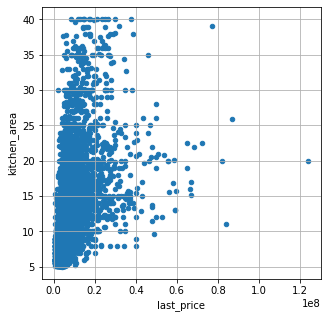

In [91]:
df.plot(x='last_price', y='kitchen_area', kind='scatter',figsize=(5, 5), sharex=False, grid=True); # смотрим зависимость стоимости недвижимости от площади кухни

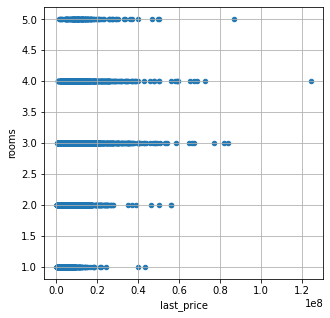

In [92]:
df.plot(x='last_price', y='rooms', kind='scatter',figsize=(5, 5), sharex=False, grid=True); # смотрим зависимость стоимости недвижимости от количества комнат

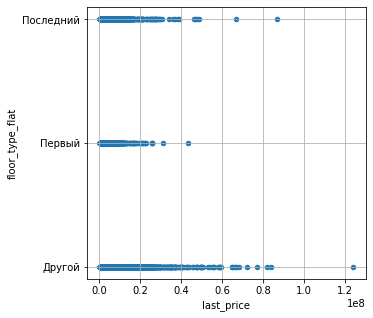

In [93]:
df.plot(x='last_price', y='floor_type_flat', kind='scatter',figsize=(5, 5), sharex=False, grid=True); # смотрим зависимость стоимости недвижимости от типа этажа

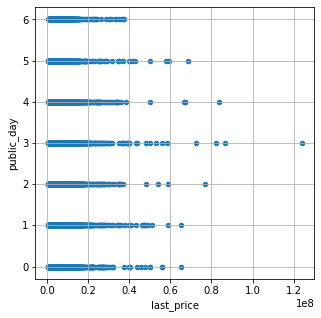

In [94]:
df.plot(x='last_price', y='public_day', kind='scatter',figsize=(5, 5), sharex=False, grid=True); # смотрим зависимость стоимости недвижимости от дня старта продажи

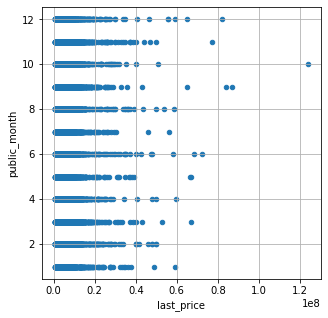

In [95]:
df.plot(x='last_price', y='public_month', kind='scatter',figsize=(5, 5), sharex=False, grid=True); # смотрим зависимость стоимости недвижимости от месяца старта продажи

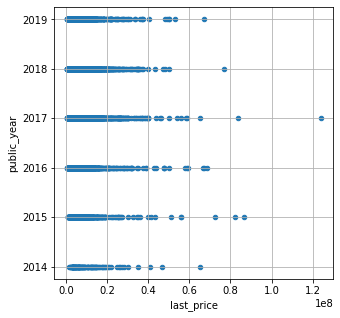

In [96]:
df.plot(x='last_price', y='public_year', kind='scatter',figsize=(5, 5), sharex=False, grid=True); # смотрим зависимость стоимости недвижимости от года старта продажи

**Вывод**

Исходя из графиков и коэфициентов кореляции можно отметить следующее:

* Абсолютно логичным выглядит тот факт, что наиболее сильно на цену обьекта недвижимости влияет его общая площадь. Это
видно на графике и об этом же нам говорит коэфициент кореляции 0,7
* Влияние этажа на стоимость не так очевидна, хотя на невысоких этажах эта зависимость проявляется сильнее
* С ростом жилой площади влияние на стоимость жилья начинает возрастать
* Квартиры с тремя и четыремя комнатами больше влияют на стоимость, чем небольшие квартиры
* Наиболее дорогими квартиры были в 2016 и 2017 годах
* К концу года стоимость на квартиры увеличивается


Посчитаем **среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [80]:

print(df['locality_name'].value_counts().head(10))#найдем наиболее часто встречаюшиеся города
tablica=df[(df['locality_name']=='Санкт-Петербург')|(df['locality_name']=='посёлок Мурино')|(df['locality_name']=='посёлок Шушары')|(df['locality_name']=='Всеволожск')|(df['locality_name']=='Колпино')|(df['locality_name']=='Пушкин')|(df['locality_name']=='посёлок Парголово')|(df['locality_name']=='Гатчина')|(df['locality_name']=='деревня Кудрово')|(df['locality_name']=='Петергоф')]
# при помощи фильтра создадим таблицу только с этими населенными пунктами
print(tablica['locality_name'].value_counts())#проверим результат новой таблицы


Санкт-Петербург      12896
посёлок Мурино         417
посёлок Шушары         383
Всеволожск             351
Колпино                309
Пушкин                 289
посёлок Парголово      286
Гатчина                261
деревня Кудрово        224
Петергоф               182
Name: locality_name, dtype: int64
Санкт-Петербург      12896
посёлок Мурино         417
посёлок Шушары         383
Всеволожск             351
Колпино                309
Пушкин                 289
посёлок Парголово      286
Гатчина                261
деревня Кудрово        224
Петергоф               182
Name: locality_name, dtype: int64


In [81]:
tablica.pivot_table(index='locality_name',values='one_sqr_meter_price',aggfunc='mean').sort_values(by='one_sqr_meter_price',ascending=False)

,one_sqr_meter_price
locality_name,
Санкт-Петербург,111030.674618
Пушкин,103711.792568
деревня Кудрово,92182.861273
посёлок Парголово,90684.422577
посёлок Мурино,85034.654392
Петергоф,83744.888597
посёлок Шушары,78500.594623
Колпино,75225.101065
Гатчина,69124.229443


Самая высокая стоимость в Санкт-Петербурге, это вполне закономерно

Наименьшая стоимость в окресностях Санкт-Петербурга: Колпино, Гатчине и Всеволжске

Теперь посмотрим, **как стоимость недвижимости в Санкт-Петербурге меняется, в зависимости от расстояния до центра города**

In [82]:
df.groupby('cityCenters_nearest_km')['one_sqr_meter_price']
df['av_price']=df['one_sqr_meter_price']/df['cityCenters_nearest_km']
piter=df[df['locality_name']=='Санкт-Петербург']
piter.sort_values(by='cityCenters_nearest_km').head()



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,one_sqr_meter_price,public_day,public_month,public_year,floor_type_flat,cityCenters_nearest_km,av_price
13919,12,65000000,129.0,2017-09-25,3,2.65,6.0,72.0,5,False,...,3.0,569.0,13.0,503875.968992,0,9,2017,Другой,0.318,1.584516e+06
7726,20,50000000,93.0,2019-04-18,2,2.65,7.0,40.0,4,False,...,3.0,569.0,NaN,537634.408602,3,4,2019,Другой,0.318,1.690674e+06
1109,1,34878556,95.8,2014-12-09,2,2.65,6.0,58.3,5,True,...,3.0,569.0,1572.0,364076.784969,1,12,2014,Другой,0.318,1.144896e+06
11492,1,46424072,92.4,2014-12-09,2,2.65,6.0,54.8,6,True,...,3.0,569.0,1030.0,502425.021645,1,12,2014,Последний,0.318,1.579953e+06
22036,3,7200000,72.0,2017-12-21,2,3.07,3.0,44.9,2,False,...,3.0,273.0,89.0,100000.000000,3,12,2017,Другой,0.329,3.039514e+05


In [83]:
piter.sort_values(by='cityCenters_nearest_km',ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,one_sqr_meter_price,public_day,public_month,public_year,floor_type_flat,cityCenters_nearest_km,av_price
19892,20,4370000,54.7,2016-03-23,3,2.50,5.0,32.8,5,False,...,0.0,NaN,939.0,79890.310786,2,3,2016,Последний,28.806,2773.391335
11652,16,4700000,51.0,2016-06-07,2,2.60,5.0,30.0,1,False,...,0.0,NaN,539.0,92156.862745,1,6,2016,Первый,28.644,3217.318208
10798,10,4850000,62.0,2017-05-16,3,2.65,5.0,35.7,1,False,...,0.0,NaN,63.0,78225.806452,1,5,2017,Первый,28.644,2730.966571
814,0,7600000,111.0,2017-07-26,3,3.00,16.0,63.0,12,False,...,2.0,72.0,66.0,68468.468468,2,7,2017,Другой,28.109,2435.820145
22916,0,5144000,64.0,2015-10-14,2,2.65,5.0,33.0,5,False,...,0.0,NaN,285.0,80375.000000,2,10,2015,Последний,28.018,2868.691555


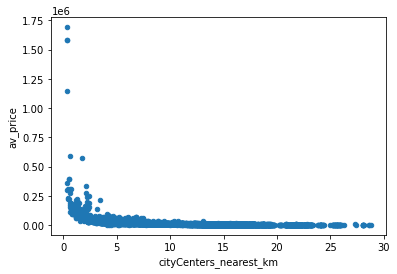

In [97]:
piter.plot(kind='scatter',x='cityCenters_nearest_km',y='av_price');

Как мы видим, все вполне предсказуемо: самая дорогая недвижимость находится непосредственно в центре Санкт-Петербурга, а те обьекты для продажи, которые находятся на большом расстоянии от центра - стоят значительно дешевле

### Общий вывод

Исходя из проведенного анализа датасета можно отметить следующие наблюдения

* Большинство квартир продается в малоэтажных домах

* Квартиры с числом комнат больше трех встречаются довольно редко

* Средняя площадь обьектов недвижимости на продажу составляет 50 квадратных метров

* Самые дорогие квартиры находятся в Санкт-Петербурге

* Большинство квартир расположены в непосредственной близости к паркам и далеко от аэропортов

* Наиболее сильно на общую стоимость обьектов недвижимости оказывает общая площадь квартиры, что вполне логично

* Средний срок продажи квартиры составляет три месяца

* Средняя цена за обьект недвижимости из представленного датасета составляет 5 миллионов рублей


